In [1]:
# Make sure to execute this cell first!
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')                  # do not show warnings
from obspy import *
from obspy.core import read, UTCDateTime
from obspy.clients.fdsn import Client
from obspy.core.inventory import Inventory, Network, Station, Channel, Site
import numpy as np
import os
from os import path
import matplotlib.pylab as plt 
from plotw_rs import plotw_rs
import cartopy.feature as cfeature
import cartopy.crs as ccrs


#
# Python adaptation of sumatra_lf_template.m
# Applied Seismology, GEOS 626, University of Alaska Fairbanks
# Python coding by Nealey Sims
# Template script for analyzing direct arrival waveforms from Sumatra:
#    channel LHZ, duration up to 10 days
#
# 
#

In [2]:
spdy = 86400;   # seconds per day
# extract the full database of BHZ waveforms

otimePDE = UTCDateTime("2004-12-26T00:58:53.0")   # origin time of Sumatra earthquake
originTime = otimePDE;
startTime  = originTime - .5*spdy
endTime    = originTime + 9*spdy
elat = 3.09
elon = 94.26
LHdirectory = "./datawf/sumatraLH"
client=Client("IRIS")
datadir="./data"

In [3]:
# max radius for station search
stasub = [0,180] #in degrees
ntwk=[]
stanames=[]
locs=[]
stas=[]
chans=[]
# Load pre-saved BHZ stations 
w=Stream()
wc=read(LHdirectory+"/*Z", header=None)
#print(wc)
wc.merge(method=1, fill_value=0)
inventory = client.get_stations(minradius=stasub[0], maxradius=stasub[1], longitude=elon, 
                    latitude=elat, network="G,II,IU", starttime=startTime, endtime =endTime,  
                    channel="LHZ", level="response")

#inventory = client.get_stations(network="G,II,IU",starttime=startTime, endtime =endTime,  
#                    channel="BHZ", level="response")
print(inventory)
for net in inventory:     
    for sta in net:
        for cha in sta:
            if str(sta.code)+str(cha.location_code) not in stanames:
                
                # Use inventory to save station locations
                try:
                    ws=wc.select(station=sta.code, location=cha.location_code)
                    ws[0].trim(originTime-(5*60),originTime+(2*3600), pad=True, fill_value=0)
                    ws[0].stats.sampling_rate=round(ws[0].stats.sampling_rate)
                    ws[0].stats.sac.stla=sta.latitude
                    ws[0].stats.sac.stlo=sta.longitude
                    w=w.append(ws[0])
                    ntwk.append(net.code)
                    stanames.append(str(sta.code)+str(cha.location_code))
                    stas.append(sta.code)
                    chans.append(cha.code)
                except:
                    pass
                
# Add station location data to the Obspy Trace
nw=len(w)
print('here is a list of the waveforms you have:');
for ii in range (nw):
    print('%3i %7s %3s %6s' % (ii,chans[ii],ntwk[ii],stas[ii]))

# save a copy to avoid rerunning
wpick=Stream()
# pick a subset of waveforms
#ipick = np.arange(nw)                   # default
ipick = [36,1,61,49,50,159]     # USER: CHANGE THIS 
for i in ipick:
    wpick.append(w[i])


Inventory created at 2021-02-16T00:34:22.000000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.47
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2004-12-25...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (3):
			G, II, IU
		Stations (138):
			G.AIS (Nouvelle-Amsterdam - TAAF, France)
			G.ATD (Arta Cave - Arta, Republic of Djibouti)
			G.CAN (Canberra, Australia)
			G.CRZF (Port Alfred - Ile de la Possession - Crozet Islands, France)
			G.DRV (Dumont d'Urville - Terre Adelie, Antarctica)
			G.ECH (Echery - Sainte Marie aux Mines, France)
			G.FDF (Fort de France - Martinique island, France)
			G.HDC (Heredia, Costa Rica)
			G.HYB (Hyderabad, India)
			G.INU (Inuyama, Japan)
			G.KIP (Kipapa, Hawaii, USA)
			G.MBO (M'Bour, Senegal)
			G.MPG (Montagne des Peres - French Guiana, France)
			G.NOUC (Port Laguerre - New Caledonia, France)
			G.PAF (Port aux Francais - Kerguelen - TAAF, France)
			G.PEL (Peldehue, Chile)
			G.PPT (Pamatai - Pa

--> entering plotw_rs.m
6
no time shift applied (default)
no time markers
6
1 event, 6 station
minimum start time of all waveforms is 2004-12-26T00:53:52.569800Z (CMLA)
reference time is 2004-12-26 00:53:52.569800+00:00
--> this will be subtracted from all time vectors
distance range is 147.1 - 51.7 = 95.5 deg
 azimuth range is 340.4 - 70.8 = 269.6
pre-processing: detrend, demean, taper
2-pole band-pass filter between T = 100.0 - 1000.0 s
6
wmax = 1.068e+06, wsep = 8.704e+05, yshift = 1.000e+00
tlims [array([ 0.]), array([ 7500.91030002])]
record section page 0/1 (max 40 per page)
tlims = 0.00 to 7500.91
ylims = 0.000e+00 to 8.000e+00 (yshift = 1.000e+00, jmax=6)


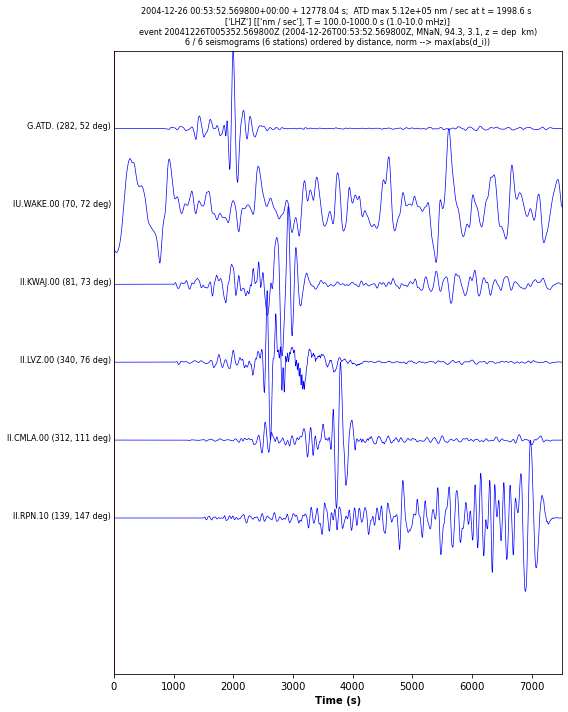

6 Trace(s) in Stream:
II.CMLA.00.LHZ | 2004-12-26T00:53:52.569800Z - 2004-12-26T02:58:53.569800Z | 1.0 Hz, 7502 samples
G.ATD..LHZ     | 2004-12-26T00:53:52.164000Z - 2004-12-26T02:58:53.164000Z | 1.0 Hz, 7502 samples
II.RPN.10.LHZ  | 2004-12-26T00:53:53.000000Z - 2004-12-26T02:58:53.000000Z | 1.0 Hz, 7501 samples
II.KWAJ.00.LHZ | 2004-12-26T00:53:52.480100Z - 2004-12-26T02:58:53.480100Z | 1.0 Hz, 7502 samples
II.LVZ.00.LHZ  | 2004-12-26T00:53:53.065300Z - 2004-12-26T02:58:53.065300Z | 1.0 Hz, 7501 samples
IU.WAKE.00.LHZ | 2004-12-26T00:53:52.860648Z - 2004-12-26T02:58:53.860648Z | 1.0 Hz, 7502 samples

--> leaving plotw_rs.m


In [4]:
# PLOTTING PARAMETERS FOR plotw_rs.m (USER: CHANGE THESE AS NEEDED)
rssort = 2      # =1 by azimuth, =2 by distance
iabs = 0
tshift = []
tmark = []
pmax = 40
iintp = 0
inorm = [1]
tlims = []
nfac = 1
azstart = []
iunit = 2
imap = 0

# plot record section
T1 = [100];
T2 = [1000];
# USER: add necessary arguments if they are different from the default
plotw_rs(wpick,elat=elat,elon=elon,rssort=rssort,iabs=iabs,
         T1=T1,T2=T2,pmax=pmax,inorm=inorm,iunit=iunit,imap=imap)

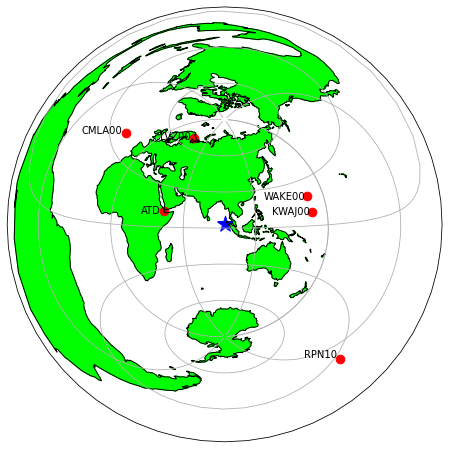

In [12]:
# Plot global map of selected stations
lat_epic = 3.09    # Latitude
lon_epic = 94.26   # Longitude


fig = plt.figure(figsize=[15, 8])
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.AzimuthalEquidistant(central_longitude=lon_epic,
                                                          central_latitude=lat_epic))

ax.set_global()
# Limit the map to -60 degrees latitude and below.
#ax.stock_img()
ax.coastlines()
ax.gridlines()
ax.add_feature(cfeature.LAND,facecolor=(0,1,0))
ax.scatter(elon, elat, c='b',marker='*', s=275, transform=ccrs.PlateCarree())
for i in range (len(ipick)):
    slon=wpick[i].stats.sac.stlo
    slat=wpick[i].stats.sac.stla
    ax.scatter(slon, slat, marker='o',c='r', s=75, transform=ccrs.PlateCarree())
    plt.text(slon - 2, slat - 2, stanames[ipick[i]],
         horizontalalignment='right',
         transform=ccrs.PlateCarree())

plt.show()